In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

mp_drawing= mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
def mediapipe_detect(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.face_landmarks,
            connections=mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 155, 0), thickness=1, circle_radius=1))

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(100, 100, 0), thickness=2, circle_radius=2))

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.left_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.right_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())

In [5]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open camera")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Use the holistic model for detection
    image, results = mediapipe_detect(frame, holistic)

    # Draw landmarks on the image
    draw_landmarks(image, results)

    # Display the frame
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

c:\Users\kabir\.vscode\Code Files\ctp-ds-project\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [6]:
results.face_landmarks.landmark

[x: 0.526284754
y: 0.635519505
z: -0.0210922379
, x: 0.527830243
y: 0.602937639
z: -0.0381801575
, x: 0.526879907
y: 0.613185287
z: -0.0196406357
, x: 0.522783
y: 0.571134269
z: -0.028730575
, x: 0.528363168
y: 0.593049884
z: -0.0406324267
, x: 0.528808
y: 0.580349
z: -0.0377948172
, x: 0.529776156
y: 0.550093949
z: -0.018286597
, x: 0.475871533
y: 0.544561327
z: 0.00793998502
, x: 0.530858457
y: 0.526236236
z: -0.0138856154
, x: 0.531702459
y: 0.512943745
z: -0.0155960098
, x: 0.533498228
y: 0.467619538
z: -0.00834905356
, x: 0.526076078
y: 0.640095592
z: -0.0201734044
, x: 0.525874615
y: 0.643527389
z: -0.0176437851
, x: 0.525712192
y: 0.644880891
z: -0.0143284006
, x: 0.525598466
y: 0.647661507
z: -0.0133736385
, x: 0.525504291
y: 0.651400745
z: -0.014478541
, x: 0.525283575
y: 0.656375289
z: -0.0156019712
, x: 0.52496773
y: 0.661729574
z: -0.0140697183
, x: 0.52409178
y: 0.672217131
z: -0.00627916027
, x: 0.527377784
y: 0.608028173
z: -0.0343687534
, x: 0.521040201
y: 0.607115626
z

In [7]:
draw_landmarks(frame, results)

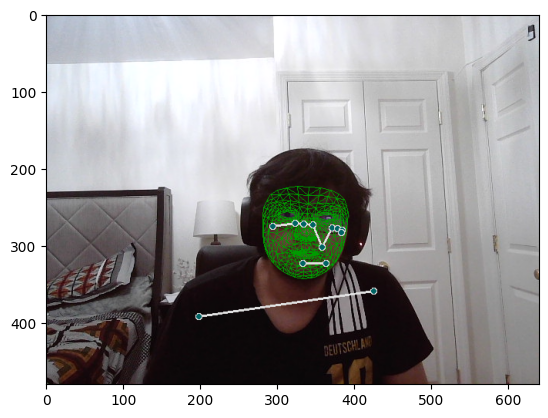

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# PRE PROC 

In [9]:
print(results.pose_landmarks.landmark)
print(results.left_hand_landmarks)
print(results.right_hand_landmarks)

[x: 0.560529768
y: 0.629374385
z: -1.33591115
visibility: 0.99933362
, x: 0.580649257
y: 0.578508615
z: -1.30976713
visibility: 0.998090386
, x: 0.591614783
y: 0.580759883
z: -1.30969548
visibility: 0.99847132
, x: 0.601447225
y: 0.583776653
z: -1.30993259
visibility: 0.997412264
, x: 0.54066503
y: 0.570258796
z: -1.33419418
visibility: 0.998939
, x: 0.523415685
y: 0.567326128
z: -1.33405375
visibility: 0.999295533
, x: 0.504998505
y: 0.565848947
z: -1.33438826
visibility: 0.999155879
, x: 0.59944284
y: 0.59109813
z: -0.932613969
visibility: 0.997698843
, x: 0.459436178
y: 0.573991835
z: -1.06297016
visibility: 0.999660134
, x: 0.568123698
y: 0.673486829
z: -1.18323684
visibility: 0.999014378
, x: 0.52086091
y: 0.674641
z: -1.21462381
visibility: 0.999702334
, x: 0.665049434
y: 0.748238742
z: -0.54456526
visibility: 0.99768889
, x: 0.310737193
y: 0.818390131
z: -0.754920602
visibility: 0.999200165
, x: 0.73147
y: 0.944766343
z: -0.440525472
visibility: 0.267790794
, x: 0.241138846
y: 1

In [10]:
for res in results.pose_landmarks.landmark:
    test= np.array([res.x,res.y,res.z,res.visibility])
test

array([ 4.71295685e-01,  2.38852429e+00, -4.83841896e-01,  4.27321211e-04])

In [11]:
results.pose_landmarks.landmark[0].x

0.5605297684669495

In [12]:
pose=[]
for res in results.pose_landmarks.landmark:
    test= np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)
pose

[array([ 0.56052977,  0.62937438, -1.33591115,  0.99933362]),
 array([ 0.58064926,  0.57850862, -1.30976713,  0.99809039]),
 array([ 0.59161478,  0.58075988, -1.30969548,  0.99847132]),
 array([ 0.60144722,  0.58377665, -1.30993259,  0.99741226]),
 array([ 0.54066503,  0.5702588 , -1.33419418,  0.99893898]),
 array([ 0.52341568,  0.56732613, -1.33405375,  0.99929553]),
 array([ 0.50499851,  0.56584895, -1.33438826,  0.99915588]),
 array([ 0.59944284,  0.59109813, -0.93261397,  0.99769884]),
 array([ 0.45943618,  0.57399184, -1.06297016,  0.99966013]),
 array([ 0.5681237 ,  0.67348683, -1.18323684,  0.99901438]),
 array([ 0.52086091,  0.67464101, -1.21462381,  0.99970233]),
 array([ 0.66504943,  0.74823874, -0.54456526,  0.99768889]),
 array([ 0.31073719,  0.81839013, -0.7549206 ,  0.99920017]),
 array([ 0.73146999,  0.94476634, -0.44052547,  0.26779079]),
 array([ 0.24113885,  1.14509559, -0.65968722,  0.61531883]),
 array([ 0.77538896,  1.20512629, -0.81888926,  0.05991402]),
 array([

In [13]:
pose= np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
pose

array([ 5.60529768e-01,  6.29374385e-01, -1.33591115e+00,  9.99333620e-01,
        5.80649257e-01,  5.78508615e-01, -1.30976713e+00,  9.98090386e-01,
        5.91614783e-01,  5.80759883e-01, -1.30969548e+00,  9.98471320e-01,
        6.01447225e-01,  5.83776653e-01, -1.30993259e+00,  9.97412264e-01,
        5.40665030e-01,  5.70258796e-01, -1.33419418e+00,  9.98938978e-01,
        5.23415685e-01,  5.67326128e-01, -1.33405375e+00,  9.99295533e-01,
        5.04998505e-01,  5.65848947e-01, -1.33438826e+00,  9.99155879e-01,
        5.99442840e-01,  5.91098130e-01, -9.32613969e-01,  9.97698843e-01,
        4.59436178e-01,  5.73991835e-01, -1.06297016e+00,  9.99660134e-01,
        5.68123698e-01,  6.73486829e-01, -1.18323684e+00,  9.99014378e-01,
        5.20860910e-01,  6.74641013e-01, -1.21462381e+00,  9.99702334e-01,
        6.65049434e-01,  7.48238742e-01, -5.44565260e-01,  9.97688890e-01,
        3.10737193e-01,  8.18390131e-01, -7.54920602e-01,  9.99200165e-01,
        7.31469989e-01,  

In [14]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
lh


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.zeros(21*3)  

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
face= np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
face

array([ 0.52628475,  0.6355195 , -0.02109224, ...,  0.58685458,
        0.54579622,  0.01097504])

In [18]:
def extract_keypoints(results):
    pose= np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face= np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [19]:
extract_keypoints(results).shape

(1662,)

In [20]:
import os
dataset_path= os.path.join('data')
actions= np.array(['hello','thanks','iloveyou'])
no_sequences= 30
sequence_length= 30

In [21]:
#run only to make the directories
#for action in actions:
    #for sequence in range(no_sequences):
        #try:
           # os.makedirs(os.path.join(dataset_path, action, str(sequence)))
      #  except FileExistsError:
       #     pass


In [22]:
# run only to make the dataset
# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Failed to open camera")
#     exit()

# for action in actions:

#     for sequence in range(no_sequences):
#         for frame_num in range(sequence_length):

#             ret, frame = cap.read()

#             if not ret:
#                 print("Failed to capture image")
#                 break

#             # Use the holistic model for detection
#             image, results = mediapipe_detect(frame, holistic)

#             # Draw landmarks on the image
#             draw_landmarks(image, results)

#             if frame_num==0: #dataset collection starting   
#                 cv2.putText(image, 'STARTING COLLECTION',(120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
#                 cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
#                 cv2.imshow('Camera', image)
#                 cv2.waitKey(2000)
#             else:
#                 cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
#                 cv2.imshow('Camera', image)
#             keypoints= extract_keypoints(results) # save the keypoints 
#             npy_path= os.path.join(dataset_path, action, str(sequence), str(frame_num))
#             np.save(npy_path, keypoints)
            
#             if cv2.waitKey(10) & 0xFF == ord('q'):   
#                 break
            


# cap.release()
# cv2.destroyAllWindows()

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [24]:
label_map= {label:num for num, label in enumerate(actions)}
label_map

{np.str_('hello'): 0, np.str_('thanks'): 1, np.str_('iloveyou'): 2}

In [25]:
sequences, labels= [], []
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res= np.load(os.path.join(dataset_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X= np.array(sequences)
y= to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.05)
X_train.shape

(85, 30, 1662)

In [30]:
X_test.shape

(5, 30, 1662)

# Modelling

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard



In [32]:
log_dir= os.path.join('Logs') #training logs from tensorboard
tb_callback= TensorBoard(log_dir=log_dir)

In [33]:
model= Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


c:\Users\kabir\.vscode\Code Files\ctp-ds-project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
res= [.7, .1, .2]
actions[np.argmax(res)]

np.str_('hello')

In [35]:
#run only to make the model
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])
#else do this:
from tensorflow.keras.models import load_model
model= load_model('action.h5')

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,677 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [37]:
res= model.predict(X_test)
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


array([[1.0000000e+00, 1.8911936e-28, 3.0838081e-08],
       [1.2866504e-20, 1.0000000e+00, 4.6921772e-11],
       [6.4613606e-17, 1.0000000e+00, 6.2450800e-09],
       [1.0000000e+00, 4.3144028e-32, 4.4866462e-09],
       [1.0000000e+00, 0.0000000e+00, 3.4967737e-11]], dtype=float32)

In [38]:
actions[np.argmax(res[2])]==actions[np.argmax(y_test[2])] #checking if the prediction is correct

True

In [39]:
#model.save('action.h5')

In [40]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, confusion_matrix
yhat= model.predict(X_train)
y_true= np.argmax(y_train, axis=1).tolist()
yhat=np.argmax(yhat, axis=1).tolist()



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


In [41]:
multilabel_confusion_matrix(y_true, yhat)

array([[[58,  0],
        [ 0, 27]],

       [[57,  0],
        [ 0, 28]],

       [[55,  0],
        [ 0, 30]]])

In [42]:
confusion_matrix(y_true, yhat)

array([[27,  0,  0],
       [ 0, 28,  0],
       [ 0,  0, 30]])

In [43]:
accuracy_score(y_true, yhat)

1.0

Amazing results!!!!!

In [51]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
sequence= []
sentence= []
threshold= 0.8

# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open camera")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Use the holistic model for detection
    image, results = mediapipe_detect(frame, holistic)

    # Draw landmarks on the image
    draw_landmarks(image, results)

    #prediction logic
    keypoints= extract_keypoints(results)
    sequence.append(keypoints)
    sequence= sequence[-30:]
    if len(sequence)==30:
        res= model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        #sentence.append(actions[np.argmax(res)])

    # visualize the prediction
    if np.max(res)>threshold:
        if len(sentence)>0:
            if actions[np.argmax(res)]!=sentence[-1]:
                sentence.append(actions[np.argmax(res)])
        else:
            sentence.append(actions[np.argmax(res)])

    if len(sentence)>5:
        sentence= sentence[-5:]
    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)  
    # Display the frame
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

note to self, im prob gonna stop here and get the info out of this model. i will need to add more classes manually using the directory in /data. 

In [45]:
colors= [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245)]
def prob_visualize(res, actions, image, colors):
    output_frame = image.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, int(num * 40)), (int(prob * 100), int((num + 1) * 40)), colors[num % len(colors)], -1)
        cv2.putText(output_frame, actions[num], (0, int(num * 40 + 30)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_visualize(res,actions,frame,colors))

In [48]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
threshold = 0.8
predictions=[] #for saving the predictions

if not cap.isOpened():
    print("Failed to open camera")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Use the holistic model for detection
    image, results = mediapipe_detect(frame, holistic)

    # Draw landmarks on the image
    draw_landmarks(image, results)

    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(actions[np.argmax(res)])

        # Visualize the prediction
        if np.unique(predictions[-10:])[0]==np.argmax(res):
            if res[np.argmax(res)]>threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize the probabilities
        colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Example colors for visualization
        image = prob_visualize(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

c:\Users\kabir\.vscode\Code Files\ctp-ds-project\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms